In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.casedeck import*
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *
from hermes3.front_tracking import *
# from hermes3.balance1d import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


# I/O


In [2]:
fcx_on_ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_on/corrected_fcx_on_high_density_4.8e18_start_floor_correction_pulse')
fcx_off_ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_off/corrected_fcx_off_high_density_4.8e18_floor_correction_start_pulse')


fcx_on_ds = fcx_on_ds.hermes.extract_1d_tokamak_geometry()
fcx_off_ds = fcx_off_ds.hermes.extract_1d_tokamak_geometry()





In [6]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m8bb-BASELINE1C_noFcx_7pcC_tanh_25ms', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases')

case = db.load_case_2D("m8bb-BASELINE1C_noFcx_7pcC_tanh_25ms", use_squash = True, verbose = True)


case_2d_fcx_off = case.ds.hermes.extract_2d_tokamak_geometry()


case_2d_fcx_off.hermesm.get_front_position(more_fronts = False)


db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m7f-BASELINE1_2x_tanh_25ms', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases')

case = db.load_case_2D("m7f-BASELINE1_2x_tanh_25ms", use_squash = True, verbose = True)

case_2d_fcx_on = case.ds.hermes.extract_2d_tokamak_geometry()

case_2d_fcx_on.hermesm.get_front_position(more_fronts = False)

params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle',
          'front_poldist_5eV']
          


profile_fcx_off = get_1d_poloidal_data(case_2d_fcx_off.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 6)
profile_fcx_off_plus1 = get_1d_poloidal_data(case_2d_fcx_off.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 7)

profile_fcx_on = get_1d_poloidal_data(case_2d_fcx_on.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 6)
profile_fcx_on_plus1 = get_1d_poloidal_data(case_2d_fcx_on.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 7)



- Reading case m8bb-BASELINE1C_noFcx_7pcC_tanh_25ms
-----------------------
- Looking for squash file
- Squash file found. squash date 03/04/2025, 17:03:43, dmp file date 03/04/2025, 17:02:01

Unnormalising with xHermes
- Reading case m7f-BASELINE1_2x_tanh_25ms
-----------------------
- Looking for squash file
- Squash file found. squash date 03/04/2025, 21:10:54, dmp file date 03/04/2025, 21:05:49

Unnormalising with xHermes
6 None
7 None
6 None
7 None


# Animation

/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  comm

KeyboardInterrupt: 

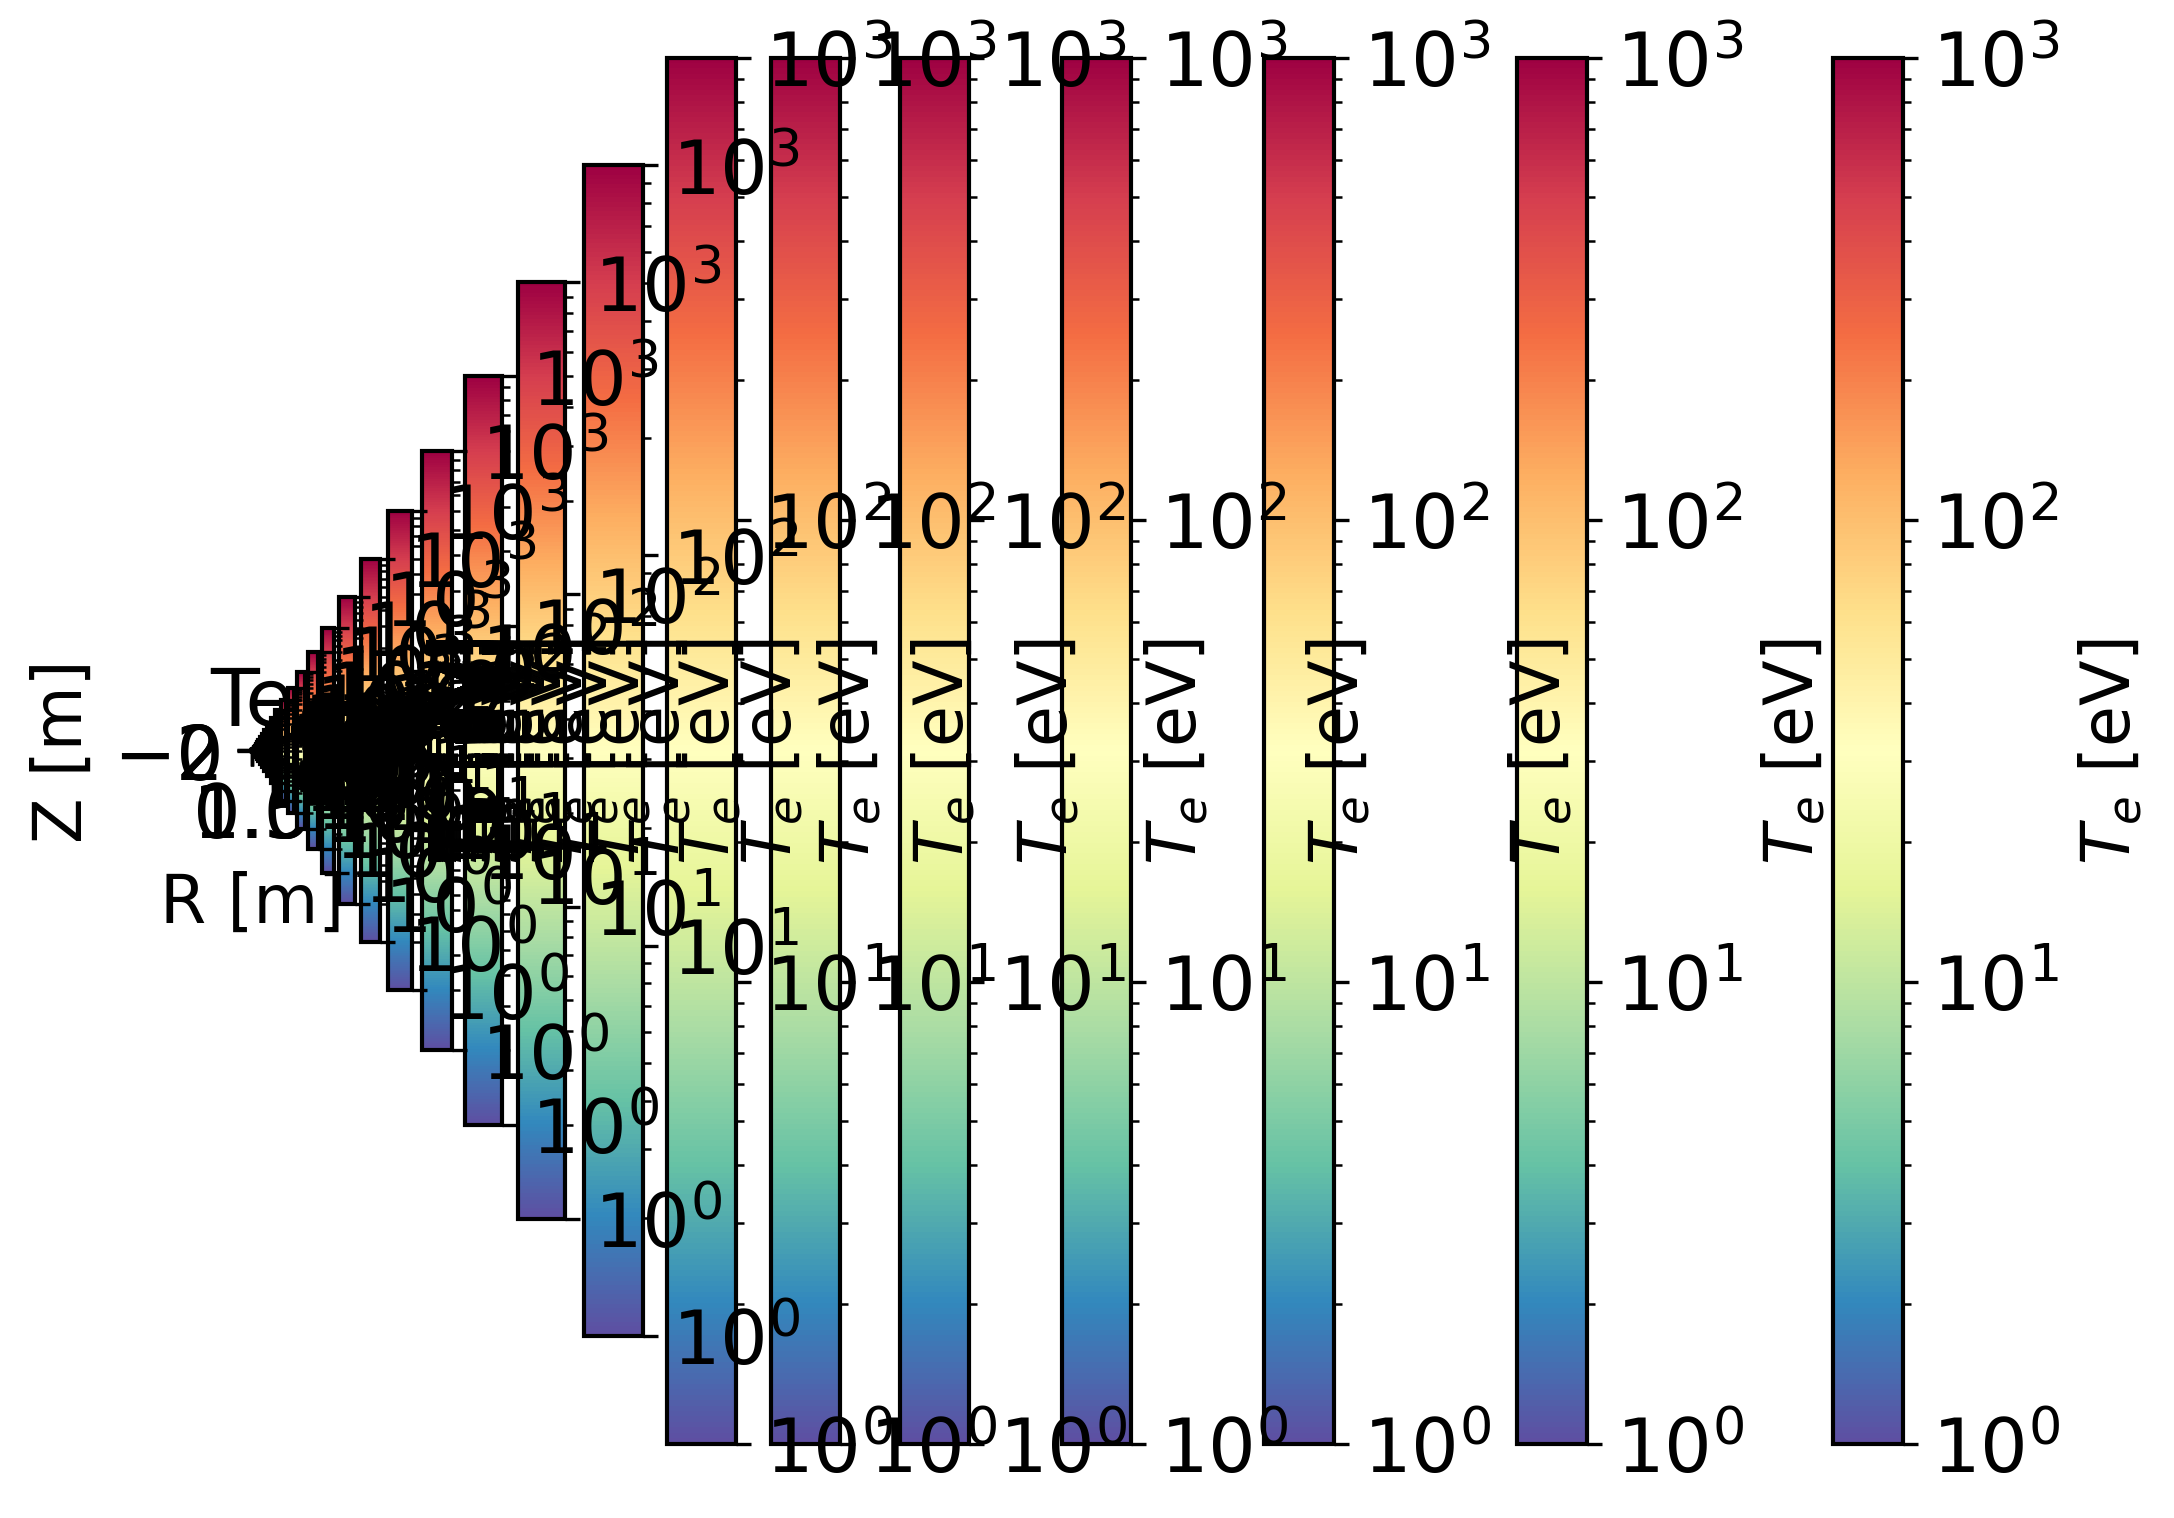

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

vmin = 1
vmax = 1000


for i, time in enumerate (case_2d_fcx_on['t']):
    case_2d_fcx_on["Te"].isel(t=i).hermesm.polygon(ax = ax, cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{e}$ [eV]")


KeyboardInterrupt: 

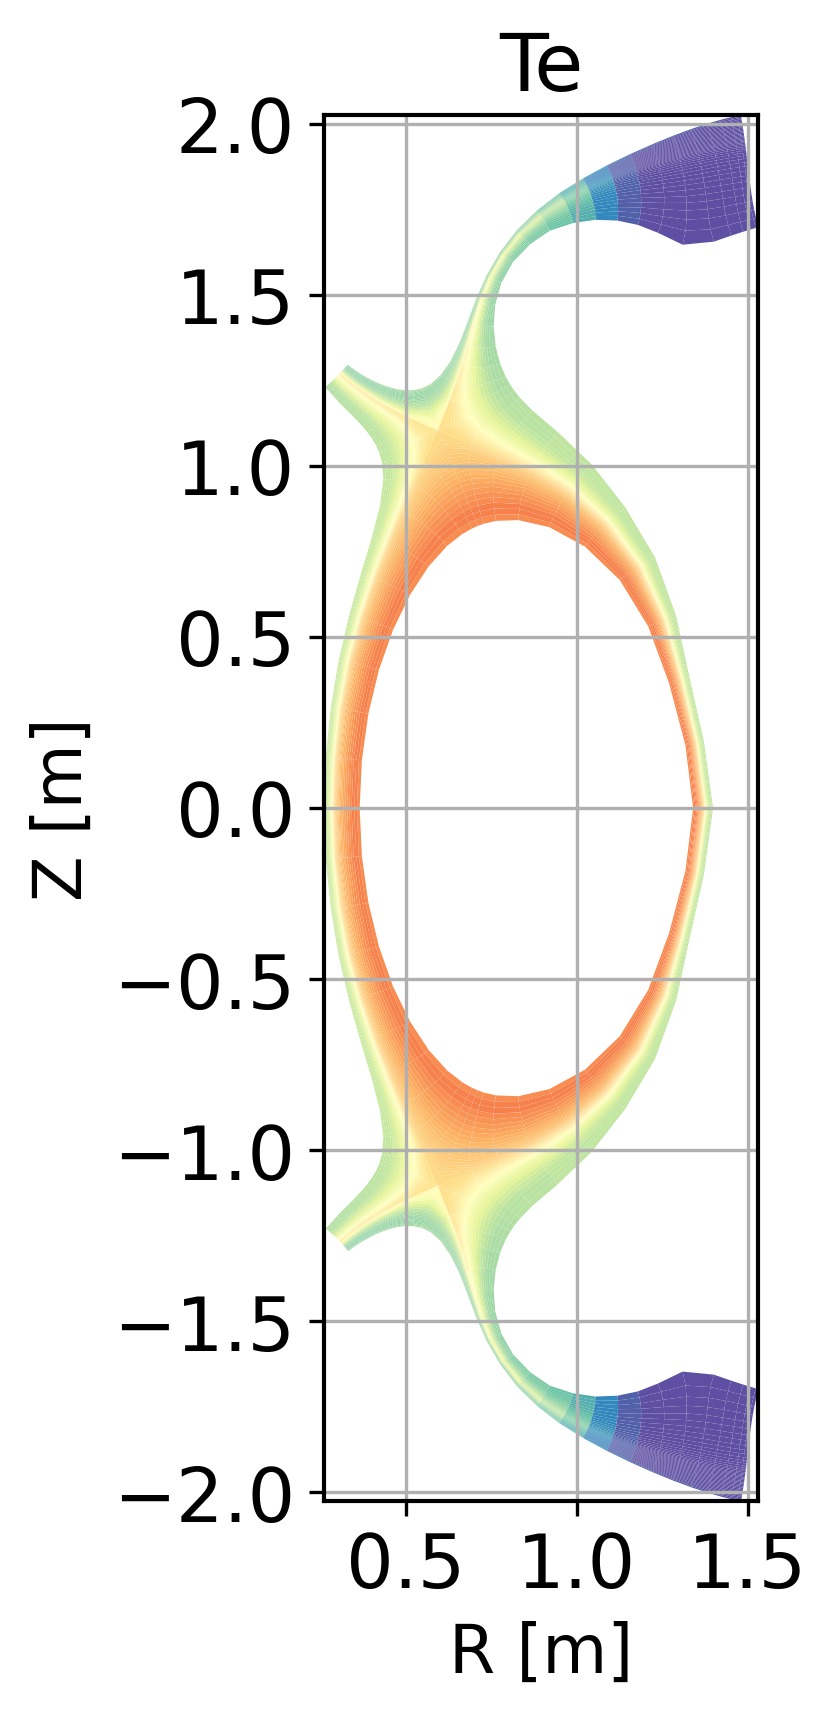

In [37]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import moviepy.editor as mpy  # Import moviepy for saving as MP4

# Create the figure and axis for plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

# Set the color limits and colormap
vmin = 1
vmax = 1000

# Set fixed axis limits to avoid the error
ax.set_xlim(0.2, 1.4)  # Adjust according to your data's range
ax.set_ylim(-2.2, 0.1)  # Adjust according to your data's range
ax.set_autoscale_on(False)  # Prevent automatic rescaling

# Function to update the plot for each time slice
def update_plot(i):
    # Clear the axis to prevent overlap of previous images
    ax.clear()
    
    # Plot the current time slice
    current_plot = case_2d_fcx_on["Te"].isel(t=i).hermesm.polygon(
        ax=ax, cmap="Spectral_r", vmin=vmin, vmax=vmax, logscale=True, 
        antialias=True, add_colorbar=False
    )
    
    # Update the title for each time slice
    ax.set_title(f"Time: {case_2d_fcx_on['t'].isel(t=i).values} s")

    # Redraw the figure to ensure it's up-to-date
    fig.canvas.draw()

    # Return the current figure as an image
    return np.array(fig.canvas.renderer._renderer)

# Create a list to store frames (images) for the video
frames = []

# Generate frames and save them in the list
for i in range(len(case_2d_fcx_on['t'][0:])):
    frame = update_plot(i)
    frames.append(frame)

# Convert the list of frames into a movie using moviepy
clip = mpy.ImageSequenceClip(frames, fps=10)  # 10 FPS for the video

# Write the final video as MP4
clip.write_videofile("2D_pulse_fcx_on.mp4", codec="libx264")

# Optionally, you can display the plot window if you want to view the animation interactively
# plt.show()


In [35]:
from moviepy.editor import VideoFileClip

# Load the GIF
gif_clip = VideoFileClip("/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients/2_D/2D_pulse_fcx_on.gif")

# Manually set the FPS if it's None
fps = 15  # or any value that suits your desired output speed

# Set duration explicitly if not set
duration = gif_clip.duration if gif_clip.duration is not None else len(gif_clip) / fps

# Ensure FPS is explicitly set in the clip (sometimes this can help)
gif_clip = gif_clip.set_fps(fps)

# Print debugging information
print(f"FPS: {fps}")
print(f"Duration: {gif_clip.duration} seconds")
print(f"Total frames: {gif_clip.reader.nframes}")

# Now write the gif to an mp4 file using the explicitly set FPS
gif_clip.write_videofile("./2D_pulse_fcx_on.mp4", codec="libx264", fps=fps, threads=4)


FPS: 15
Duration: 30.1 seconds
Total frames: 302
Moviepy - Building video ./2D_pulse_fcx_on.mp4.
Moviepy - Writing video ./2D_pulse_fcx_on.mp4



TypeError: must be real number, not NoneType

# detachment front location

In [6]:
detachment_loc_fcx_off = []
for i, value in enumerate(case_2d_fcx_off['t']):
    case = case_2d_fcx_off.isel(t=i)
    profile_fcx_off = get_1d_poloidal_data(case, params = params, region = ('outer_lower'), sepadd = 6)
    profile_fcx_off_plus1 = get_1d_poloidal_data(case, params = params, region = ('outer_lower'), sepadd = 7)
    print(profile_fcx_off['front_poldist_5eV'][0])
    detachment_loc_fcx_off.append(profile_fcx_off['front_poldist_5eV'][0])

detachment_loc_fcx_on = []
for i, value in enumerate(case_2d_fcx_on['t']):
    case = case_2d_fcx_on.isel(t=i)
    profile_fcx_on = get_1d_poloidal_data(case, params = params, region = ('outer_lower'), sepadd = 6)
    profile_fcx_on_plus1 = get_1d_poloidal_data(case, params = params, region = ('outer_lower'), sepadd = 7)
    print(profile_fcx_on['front_poldist_5eV'][0])
    detachment_loc_fcx_on.append(profile_fcx_on['front_poldist_5eV'][0])



6 None
7 None
6.499300936427808
6 None
7 None
6.498141761169817
6 None
7 None
6.497036670801464
6 None
7 None
6.495771126803637
6 None
7 None
6.494014363081126
6 None
7 None
6.491082391798079
6 None
7 None
6.48548957930246
6 None
7 None
6.474066164087455
6 None
7 None
6.450286972149071
6 None
7 None
6.401802005261581
6 None
7 None
6.309312891445954
6 None
7 None
6.151324023796427
6 None
7 None
5.762169608605083
6 None
7 None
5.339122636436056
6 None
7 None
4.6558444522271145
6 None
7 None
4.206348625204459
6 None
7 None
3.652590167755516
6 None
7 None
3.5301096602203685
6 None
7 None
3.5371882717580476
6 None
7 None
3.5850901690861505
6 None
7 None
3.648371240428535
6 None
7 None
3.7193362002757873
6 None
7 None
3.794848850234242
6 None
7 None
3.873732614460593
6 None
7 None
3.9570381578565588
6 None
7 None
4.045855518803798
6 None
7 None
4.141938592482234
6 None
7 None
4.2062738242491875
6 None
7 None
4.2504149534465085
6 None
7 None
4.301537653709225
6 None
7 None
4.398067620561456
6

Text(0.5, 0, 'Time (ms)')

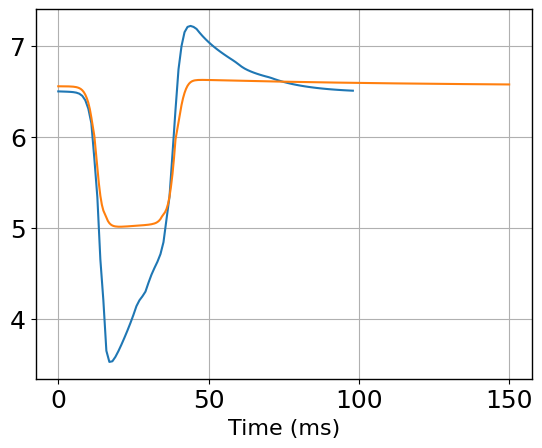

In [7]:
t_fcx_off_2D = (case_2d_fcx_off['t'] - case_2d_fcx_off['t'][0]) * 1e3
t_fcx_on_2D = (case_2d_fcx_on['t'] - case_2d_fcx_on['t'][0]) * 1e3
plt.plot(t_fcx_off_2D, detachment_loc_fcx_off)
plt.plot(t_fcx_on_2D, detachment_loc_fcx_on)
plt.xlabel('Time (ms)')


# Calculate detachment front response

In [8]:
def front_tracking(ds):
    ds = ds.copy()
    df = pd.DataFrame()
    df.index = range(ds.dims["t"])
    dist = ds["pos"].values
    df["t"] = ds["t"]

    def find_crossing(dist, data, threshold):

        # Find indices where the temperature crosses the threshold
        final_crossing = np.where(np.diff(np.signbit(data - threshold)))[0][-1]

        # Initialize a list to store crossing times
        crossing_times = []

        # Interpolate within each crossing interval to find the exact crossing time
        t1, t2 = dist[final_crossing], dist[final_crossing + 1]
        data1, data2 = data[final_crossing], data[final_crossing + 1]

        # Linear interpolation to find the crossing time
        location = t1 + (threshold - data1) * (t2 - t1) / (data2 - data1)

        return location



    for t in range(ds.dims["t"]):

        timeslice = ds.isel(t=t)
        df.loc[t, "5eV"] =  max(ds['y'].values) - find_crossing(dist, timeslice["Te"].values, 5)



    # print(df.index)
    # print(df.index.duplicated())

    ds["front_pardist_5eV"] = xr.DataArray(df["5eV"].values, dims=["t"], coords={"t": ds["t"].values})
    ds["front_pardist_5eV"].attrs.update(dict(
        short_name = "5eV front pol. distance from target [m]",
        units = "m",
        origin = "sdtools")
    )

    return ds
# ds["front_poldist_5eV"] = xr.DataArray(df["5eV"].values, dims = ["t"])

In [9]:
fcx_on_ds = front_tracking(fcx_on_ds)
fcx_off_ds = front_tracking(fcx_off_ds)

In [10]:
t_on = fcx_on_ds["t"].values
t_on = (t_on - t_on[0])*1e3

t_off = fcx_off_ds["t"].values
t_off = (t_off - t_off[0])*1e3


In [11]:


pe_src_fcx_on = []
pe_src_fcx_off = []


# print(fcx_on_ds.dims["t"])
for t in fcx_on_ds["t"]:
    pe_src_fcx_on.append(fcx_on_ds["Pe_src"].sel(t=t).values[3])

for t in fcx_off_ds["t"]:
    pe_src_fcx_off.append(fcx_off_ds["Pe_src"].sel(t=t).values[3])




# ax.plot(fcx_on_ds["t"], fcx_on_ds["Pe_src"][0], label="fcx_on", linewidth=linewidth)


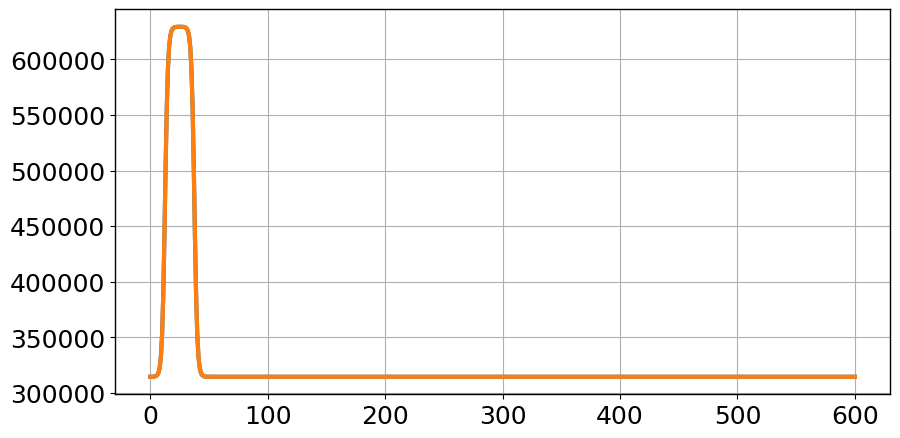

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))



ax.plot(t_on, pe_src_fcx_on, label="fcx_on", linewidth=linewidth)
ax.plot(t_off, pe_src_fcx_off, label="fcx_off", linewidth=linewidth)

Text(0, 0.5, 'Parallel distance from target (m)')

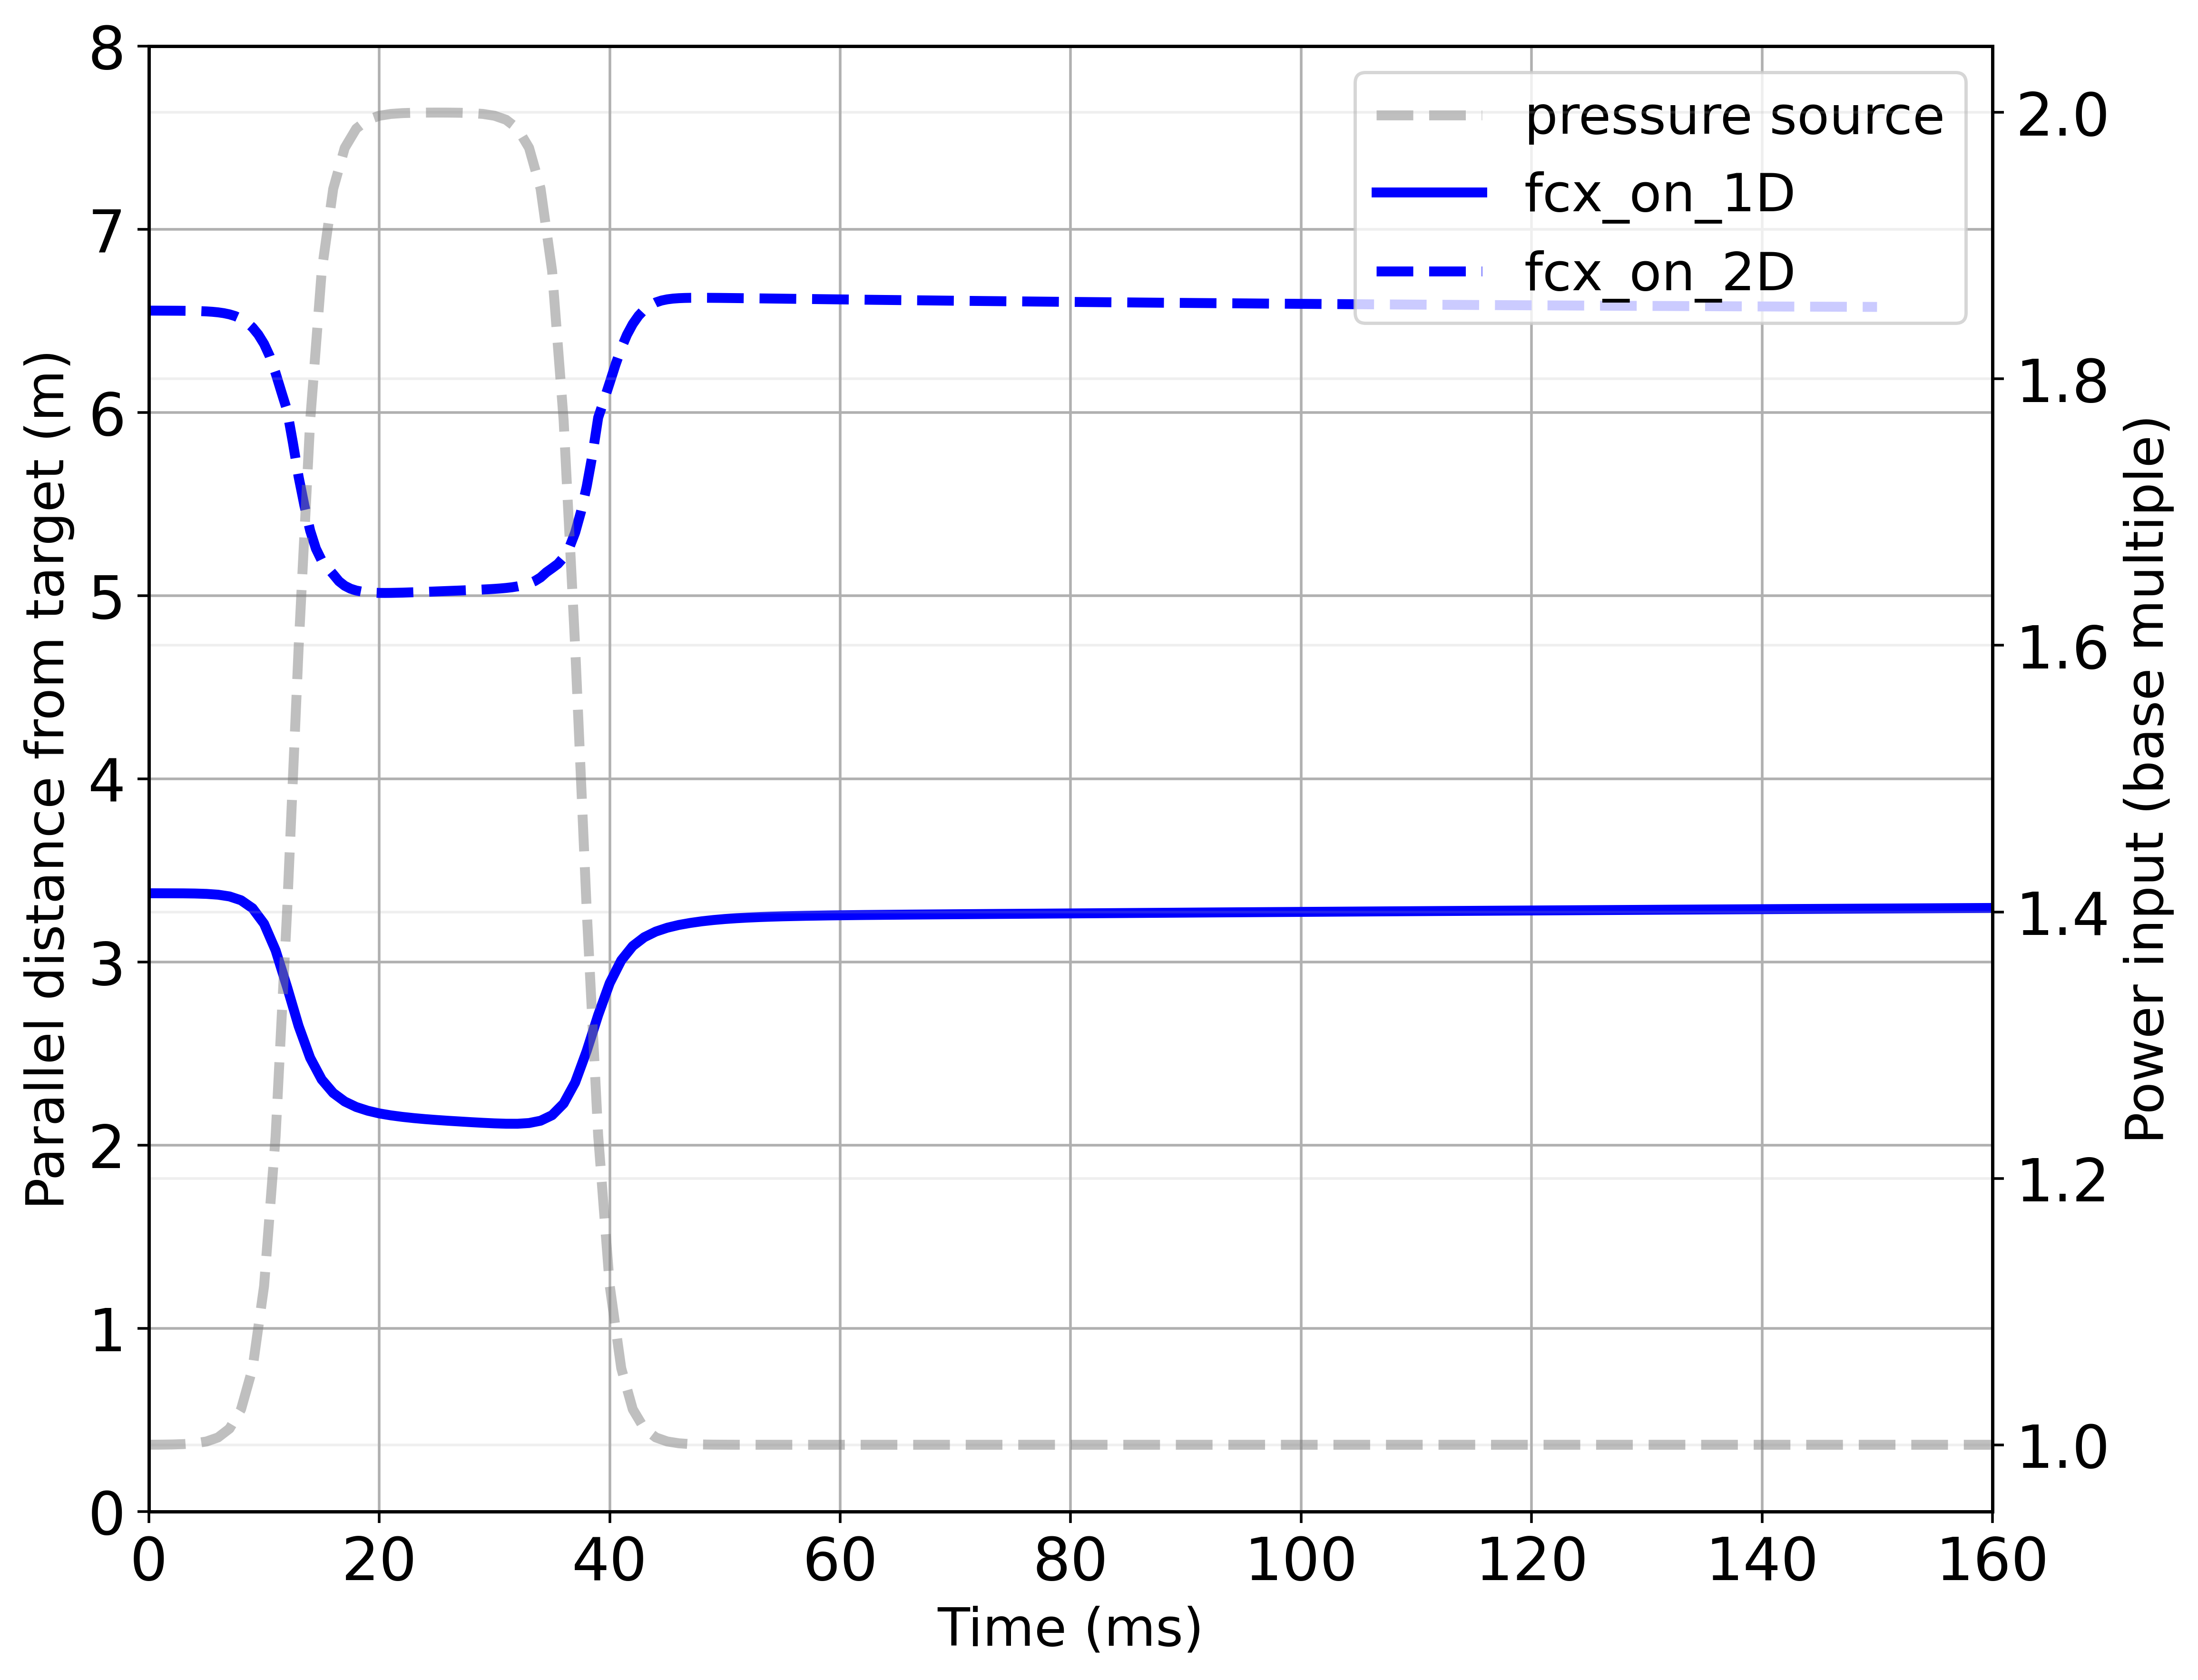

In [18]:
fig, ax = plt.subplots(1,1 , figsize=(10, 8), dpi = 500)    
ax2 = ax.twinx()

pe_src_fcx_on_norm = pe_src_fcx_on/np.min(pe_src_fcx_on)

linewidth = 3

# Plot the three datasets on ax and ax2
line1, = ax2.plot(t_on, pe_src_fcx_on_norm, label="pressure source", linewidth=linewidth, linestyle="--", color='grey', alpha=0.5)
line2, = ax.plot(t_on, fcx_on_ds["front_pardist_5eV"], label="fcx_on_1D", color='blue', linewidth=linewidth)
# line3, = ax.plot(t_off, fcx_off_ds["front_pardist_5eV"], label="fcx_off_1D", color='red', linewidth=linewidth)
# line4, = ax.plot(t_fcx_off_2D, detachment_loc_fcx_off, label="fcx_off_2D", color='red', linewidth=linewidth, linestyle='--')
line5, = ax.plot(t_fcx_on_2D, detachment_loc_fcx_on, label="fcx_on_2D", color='blue', linewidth=linewidth, linestyle='--')

# Combine the lines and labels from both axes
lines = [line1, line2, line5]
labels = [line.get_label() for line in lines]

# fig.legend(ncols = 3 , loc = 'upper center', fontsize = 16)
ax.legend(lines, labels, loc='upper right')

ax2.grid(alpha=0.2)

# ax.set_ybound(0, np.max(fcx_off_ds["front_pardist_5eV"]+ 1))
ax.set_xbound(0, 160)
ax.set_ybound(0,8)
ax2.set_ylabel("Power input (base multiple)")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Parallel distance from target (m)")

Text(0, 0.5, 'Parallel distance from target (m)')

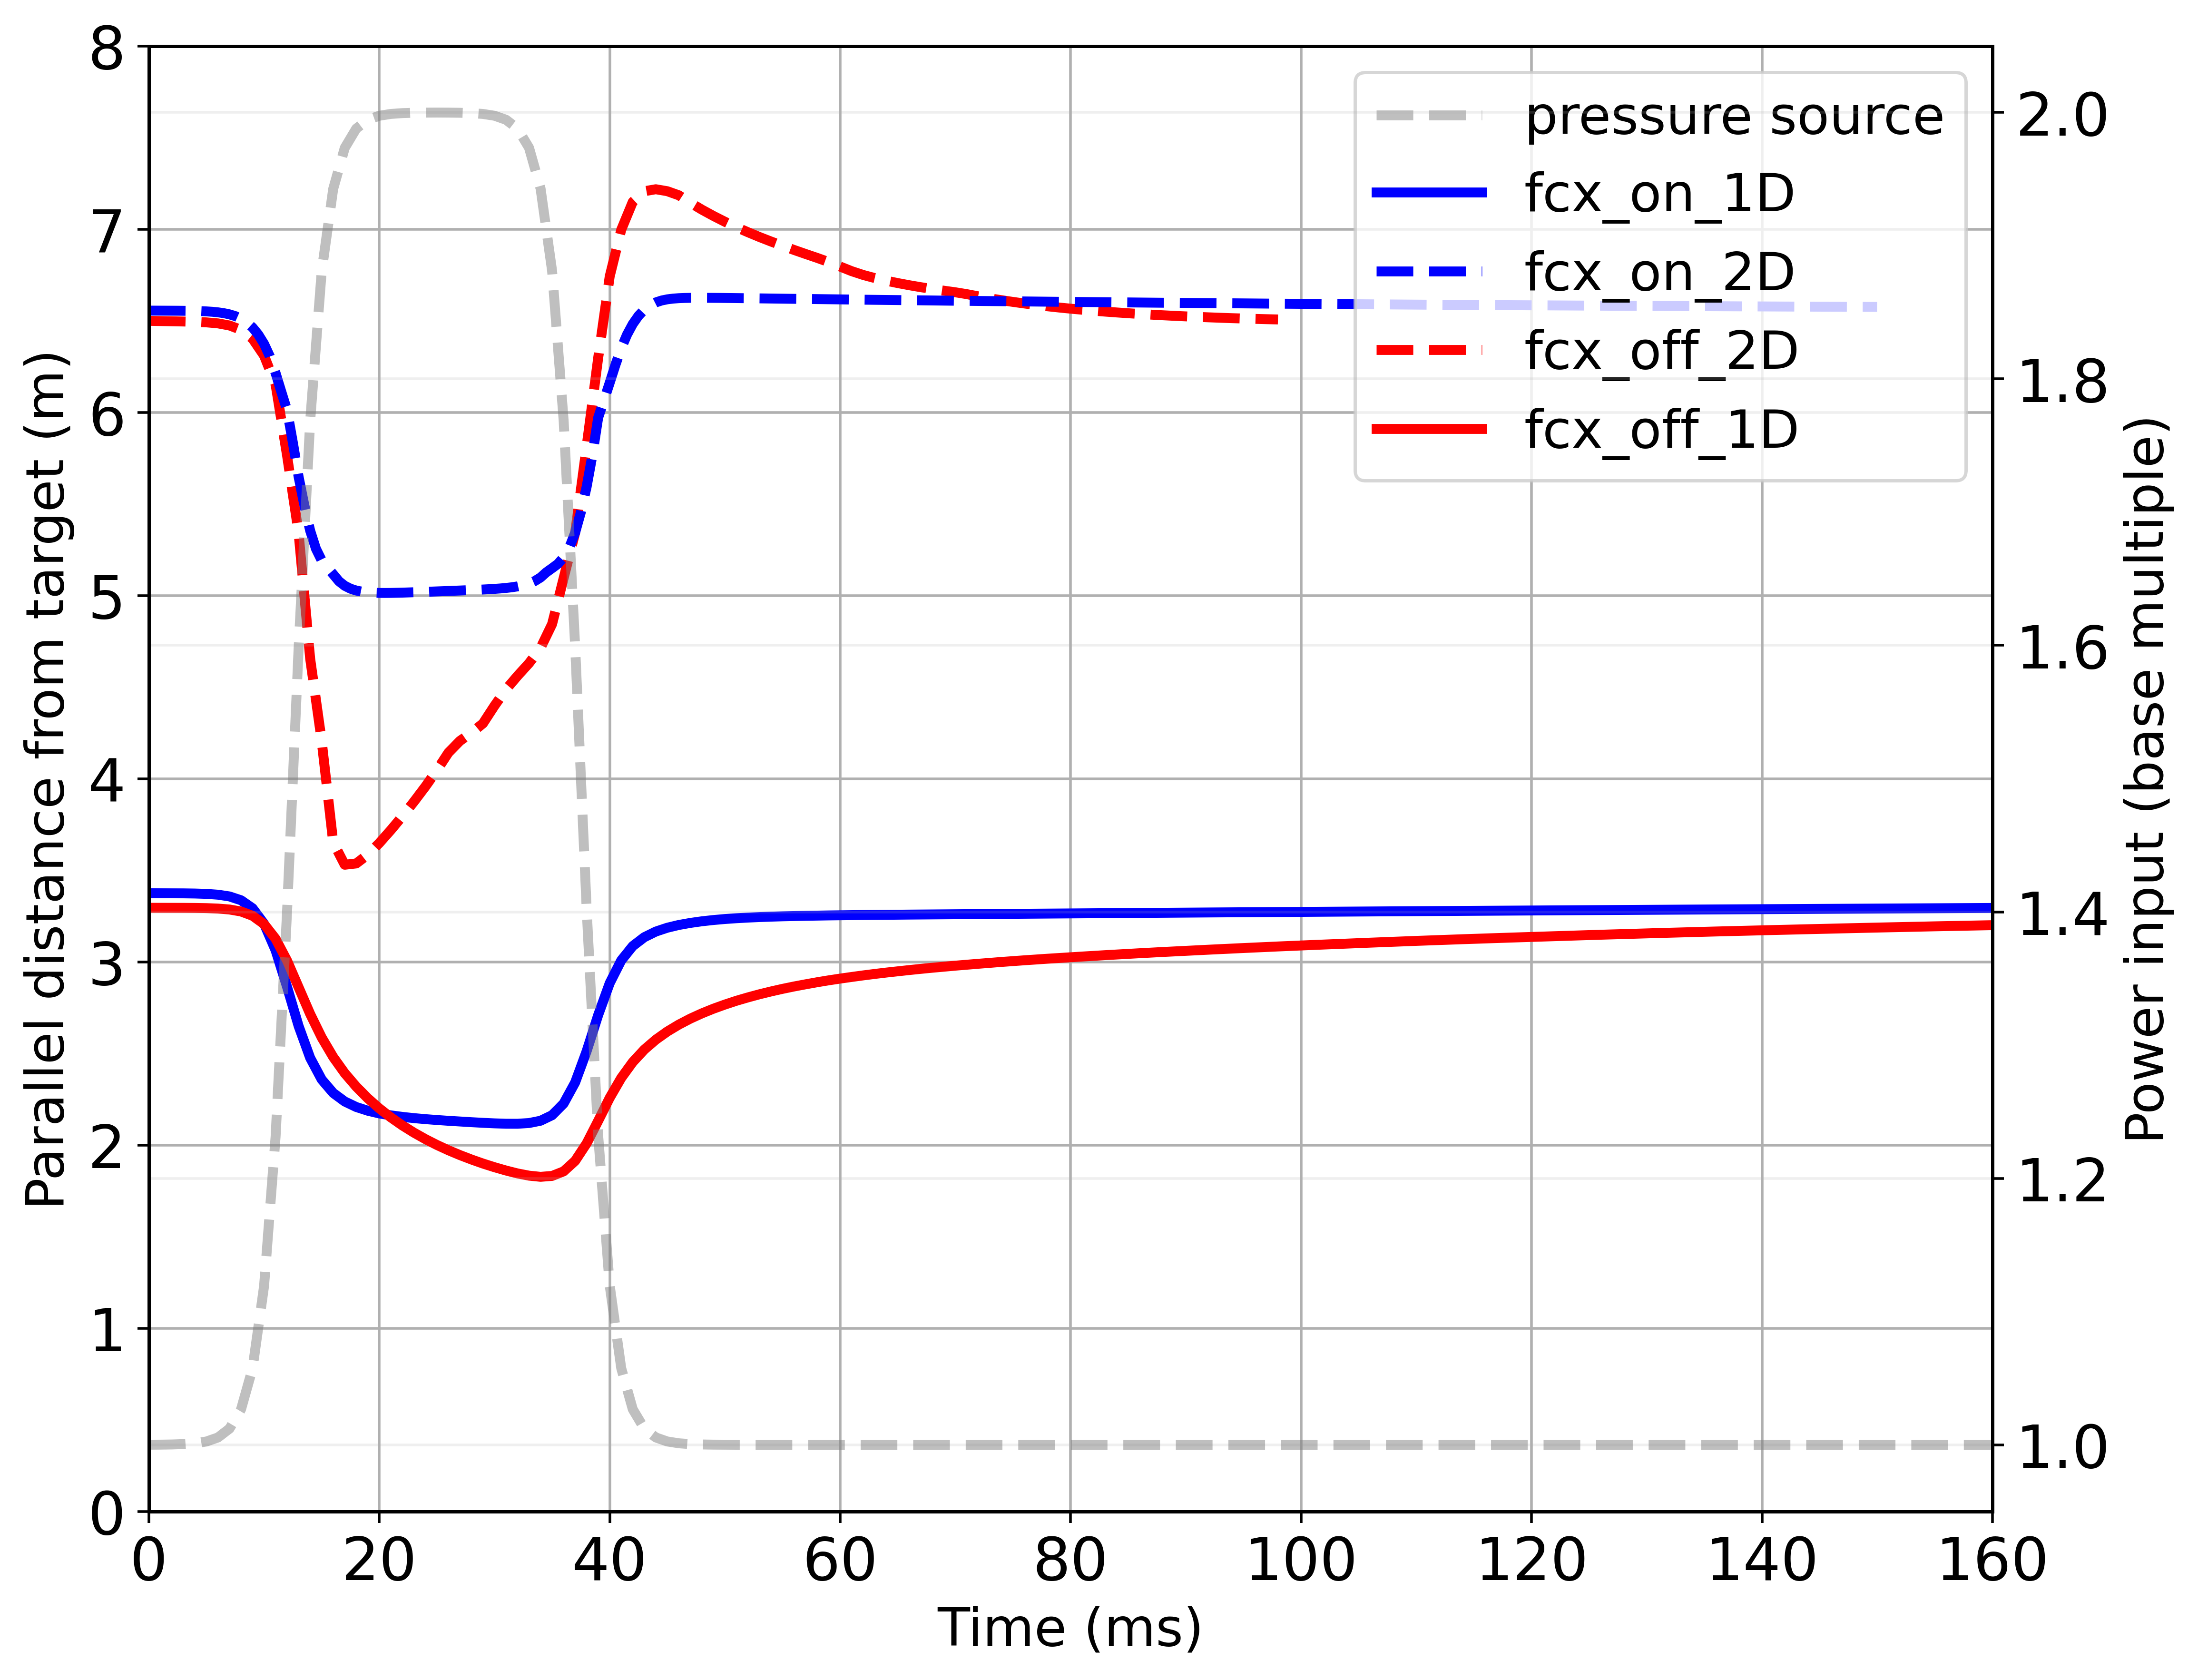

In [19]:
fig, ax = plt.subplots(1,1 , figsize=(10, 8), dpi = 500)    
ax2 = ax.twinx()

pe_src_fcx_on_norm = pe_src_fcx_on/np.min(pe_src_fcx_on)

linewidth = 3

# Plot the three datasets on ax and ax2
line1, = ax2.plot(t_on, pe_src_fcx_on_norm, label="pressure source", linewidth=linewidth, linestyle="--", color='grey', alpha=0.5)
line2, = ax.plot(t_on, fcx_on_ds["front_pardist_5eV"], label="fcx_on_1D", color='blue', linewidth=linewidth)
line5, = ax.plot(t_off, fcx_off_ds["front_pardist_5eV"], label="fcx_off_1D", color='red', linewidth=linewidth)
line4, = ax.plot(t_fcx_off_2D, detachment_loc_fcx_off, label="fcx_off_2D", color='red', linewidth=linewidth, linestyle='--')
line3, = ax.plot(t_fcx_on_2D, detachment_loc_fcx_on, label="fcx_on_2D", color='blue', linewidth=linewidth, linestyle='--')

# Combine the lines and labels from both axes
lines = [line1, line2, line3, line4, line5]
labels = [line.get_label() for line in lines]

# fig.legend(ncols = 3 , loc = 'upper center', fontsize = 16)
ax.legend(lines, labels, loc='upper right')

ax2.grid(alpha=0.2)

# ax.set_ybound(0, np.max(fcx_off_ds["front_pardist_5eV"]+ 1))
ax.set_xbound(0, 160)
ax.set_ybound(0,8)
ax2.set_ylabel("Power input (base multiple)")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Parallel distance from target (m)")

# Particle totals

KeyboardInterrupt: 

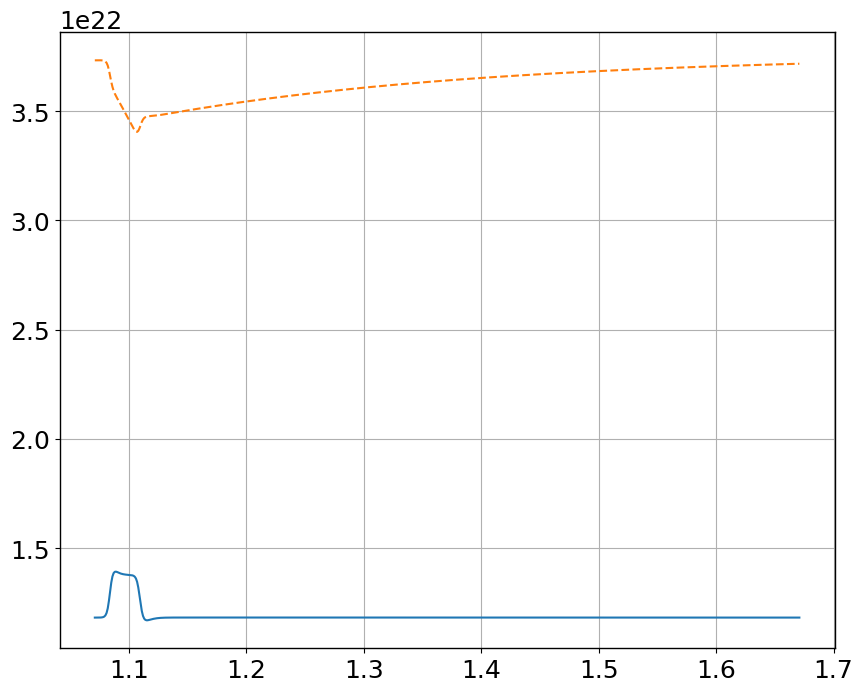

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax2 = ax.twinx()
for i, label in zip([fcx_on_ds, fcx_off_ds], ['fcx_on', 'fcx_off']):
    # Sum over the 'pos' dimension for each time step (axis=1 corresponds to 'pos')

    if label == 'fcx_off':
        i = i.isel(t=slice(278, None))
        
    Ne_total = (i["Ne"] * i['dv']).sum(dim="pos").values  # Sum over all space (pos) for each time
    Ni_total = (i["Nd+"] * i['dv']).sum(dim="pos").values  # Sum over all space (pos) for each time
    Nd_total = (i["Nd"] * i['dv']).sum(dim="pos").values # Sum over all space (pos) for each time
    Nplas_total = Ne_total + Ni_total
    # t['t'] = (t['t'] - t['t'][0])*1e3


    # Plot the total number of particles for Ne and Nd vs. time
    # ax.plot(i["t"], Ne_total , label=f"{label} Ne + Nd+")
    ax.plot(i["t"], Nplas_total, label=f"{label} Ne + Nd", linestyle="-")
    # ax.plot(i["t"], Ni_total, label=f"{label} Ni", linestyle=":")
    ax.plot(i["t"], Nd_total, label=f"{label} Nd", linestyle="--")

fig.legend(ncols = 4 , loc = 'upper center', fontsize = 16)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Total number of particles")
ax.set_ylabel("Total number of particles")

### determine when the pulses start

In [ ]:
for i, value in enumerate(pe_src_fcx_on):
    if value == min(pe_src_fcx_on):
        print('fcx_on',i)
        break

for i, value in enumerate(pe_src_fcx_off):
    if value > min(pe_src_fcx_off):
        print('fcx_off',i)
        break


fcx_on 84
fcx_off 0


# comparison with base sep_add_6

In [ ]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m7a-base_from_m6c_BASELINE1', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases')

case = db.load_case_2D("m7a-base_from_m6c_BASELINE1", use_squash = True, verbose = True)

case_2d_geom = case.ds.hermes.extract_2d_tokamak_geometry()

case_1d = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_on/corrected_fcx_on_high_density_4.8e18_start_floor_correction')

case_1d = case_1d.hermes.extract_1d_tokamak_geometry()

- Reading case m7a-base_from_m6c_BASELINE1
-----------------------
- Looking for squash file
- Squash file found. squash date 02/26/2025, 18:53:30, dmp file date 02/26/2025, 18:29:29

Unnormalising with xHermes


In [ ]:


params = ['R', 'Z', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle']
          
profile_minus1 = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 0)
profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 6)
profile_plus1 = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 2)


0 None
6 None
2 None


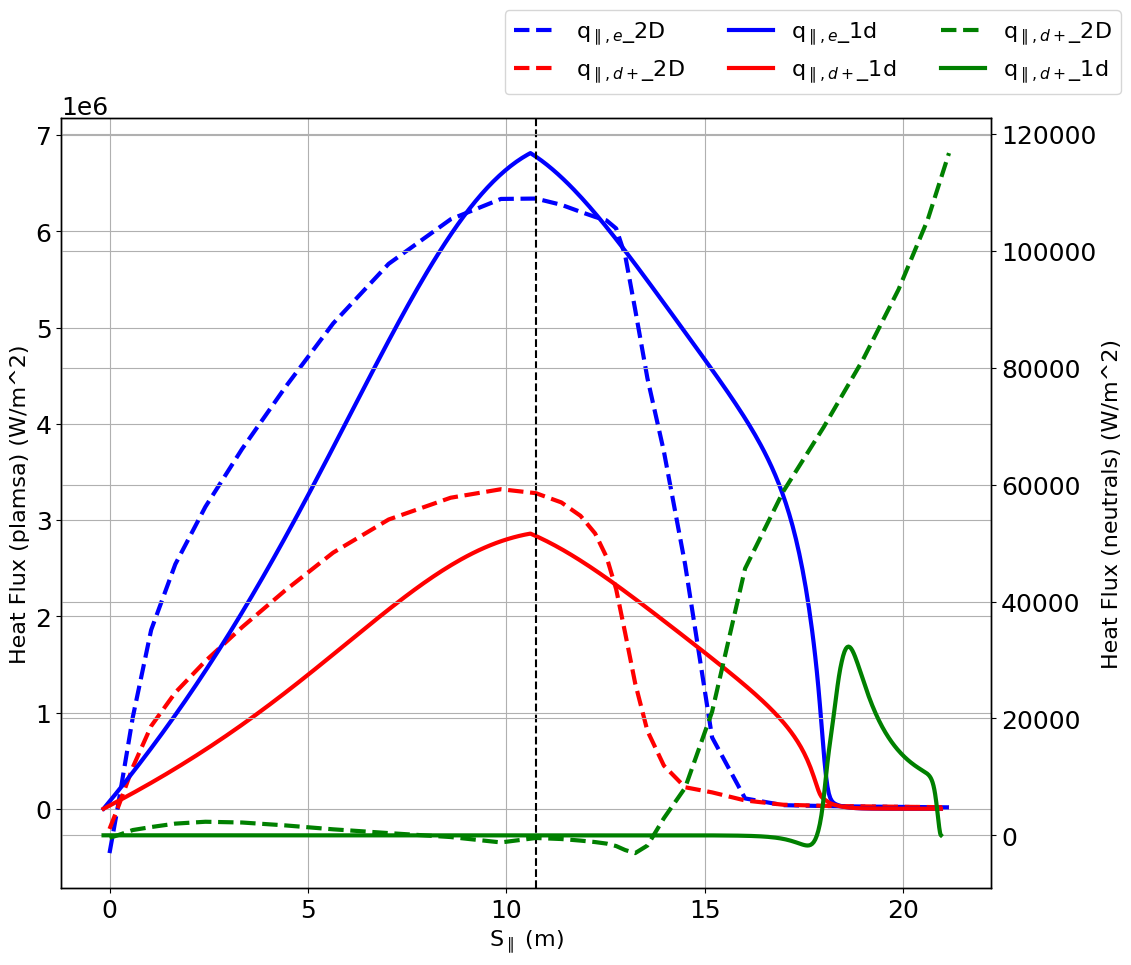

In [ ]:

da_yface = profile['dx']*profile['dz']*profile['J']/np.sqrt(profile['g_22'])
da_xface = profile['dy']*profile['dz'] # Needs to be dy*dz! 

case = case_1d.isel(t=-1)

for i in ['e', 'd+']:

    profile[f'hflx{i}_tot_ylow'] = profile[f'ef{i}_tot_ylow']/da_yface

    profile_minus1[f'hflx{i}_tot_xlow'] = profile_minus1[f'ef{i}_tot_xlow']/da_xface
    profile[f'hflx{i}_tot_xlow'] = profile[f'ef{i}_tot_xlow']/da_xface
    profile_plus1[f'hflx{i}_tot_xlow'] = profile_plus1[f'ef{i}_tot_xlow']/da_xface




# print(profile['hflxd+_tot_ylow'][xpoint_ind]/profile['hflxe_tot_ylow'][xpoint_in

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax2 = ax.twinx()

para_neut_adv = profile['efd_adv_par_ylow']/da_yface
para_neut_cond = profile['efd_cond_par_ylow']/da_yface
para_neut_tot = para_neut_cond + para_neut_adv

ax.plot(profile['Spar'], profile['hflxe_tot_ylow'], label = r'q$_{\parallel,e}$_2D', linewidth = linewidth, color = 'b', linestyle = '--')
ax.plot(profile['Spar'], profile['hflxd+_tot_ylow'], label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'r', linestyle = '--')
ax2.plot(profile['Spar'], para_neut_tot, label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'g', linestyle = '--')

ax.plot(case['pos'], case['efe_tot_ylow']/case['da'], label = r'q$_{\parallel,e}$_1d', linewidth = linewidth, color = 'b')
ax.plot(case['pos'], case['efd+_tot_ylow']/case['da'], label = r'q$_{\parallel,d+}$_1d', linewidth = linewidth, color = 'r')
ax2.plot(case['pos'], case['efd_tot_ylow']/case['da'], label = r'q$_{\parallel,d+}$_1d', linewidth = linewidth, color = 'g')


xpoint_ind = np.argmin(profile['R'])
xpoint_loc = profile['Spar'][xpoint_ind]
# ax2.plot(profile['Spar'], profile['hflxe_tot_xlow'], label = 'X low', linewidth = linewidth, linestyle = '--')
ax.axvline(xpoint_loc, color = 'black', linestyle = '--')

# ax.set_yscale('log')

ax.set_xlabel(r'S$_{\parallel}$ (m)')
ax.set_ylabel('Heat Flux (plamsa) (W/m^2)')
ax2.set_ylabel('Heat Flux (neutrals) (W/m^2)')
# ax2.legend(loc = 'upper right')
# ax.legend(loc ='upper left')
fig.legend(ncols = 3, loc = 'upper right')
    

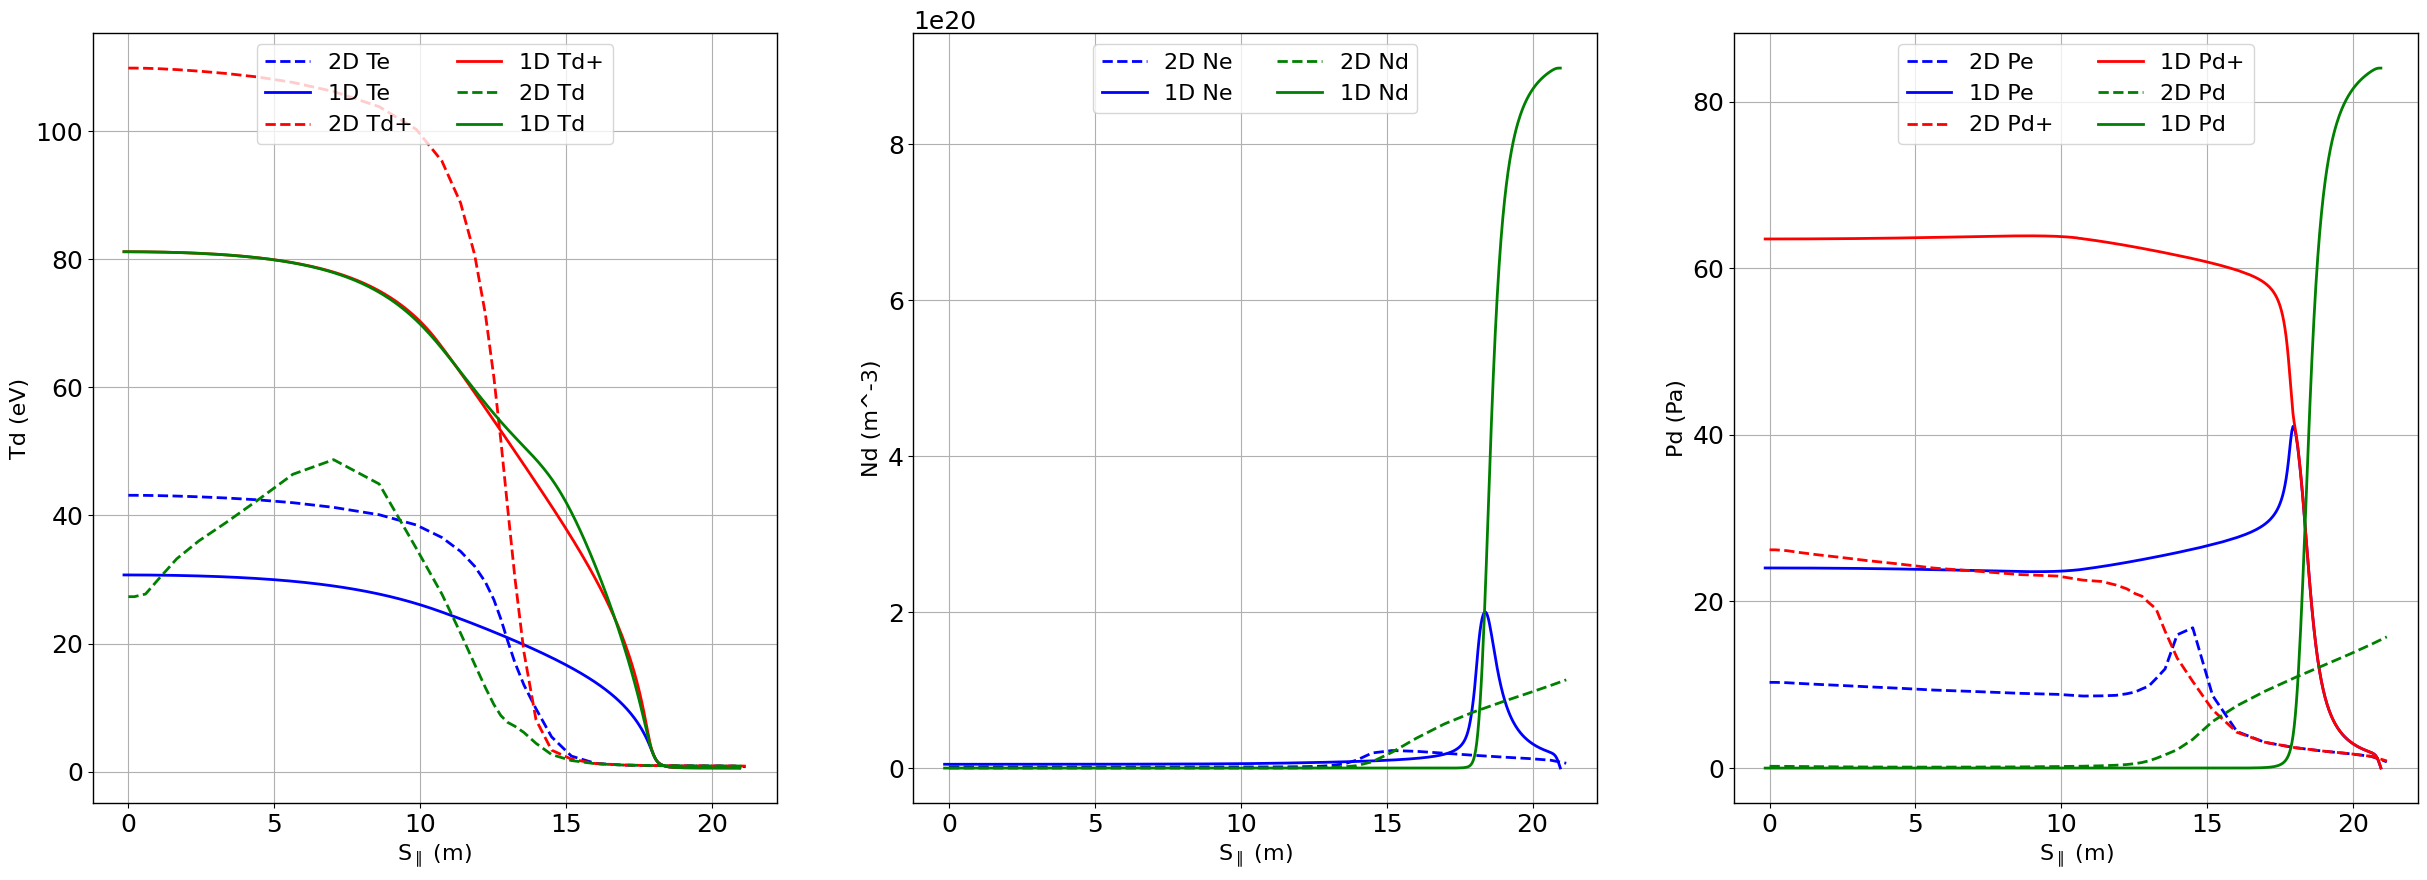

In [ ]:

plot_params = [['Te', 'Td+', 'Td'], ['Ne', 'Nd'], ['Pe', 'Pd+', 'Pd']]
colors = ['b', 'r', 'g']

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax = ax.flatten()

for i, params in enumerate(plot_params):
    if i == 1:
        colors = colors = ['b', 'g']

    else:
        colors = ['b', 'r', 'g']
    for j, param in enumerate(params):

        # Assign colors using the index 'j' for each subplot's parameter
        ax[i].plot(profile['Spar'], profile[param], label=f'2D {param}', 
                   linewidth=2, linestyle='--', color=colors[j])
        ax[i].plot(case['pos'], case[param], label=f'1D {param}', 
                   linewidth=2, color=colors[j])
    ax[i].legend(ncols=2, loc='upper center')
    ax[i].set_xlabel(r'S$_{\parallel}$ (m)')
    ax[i].set_ylabel(f'{param} ({case[param].units})')




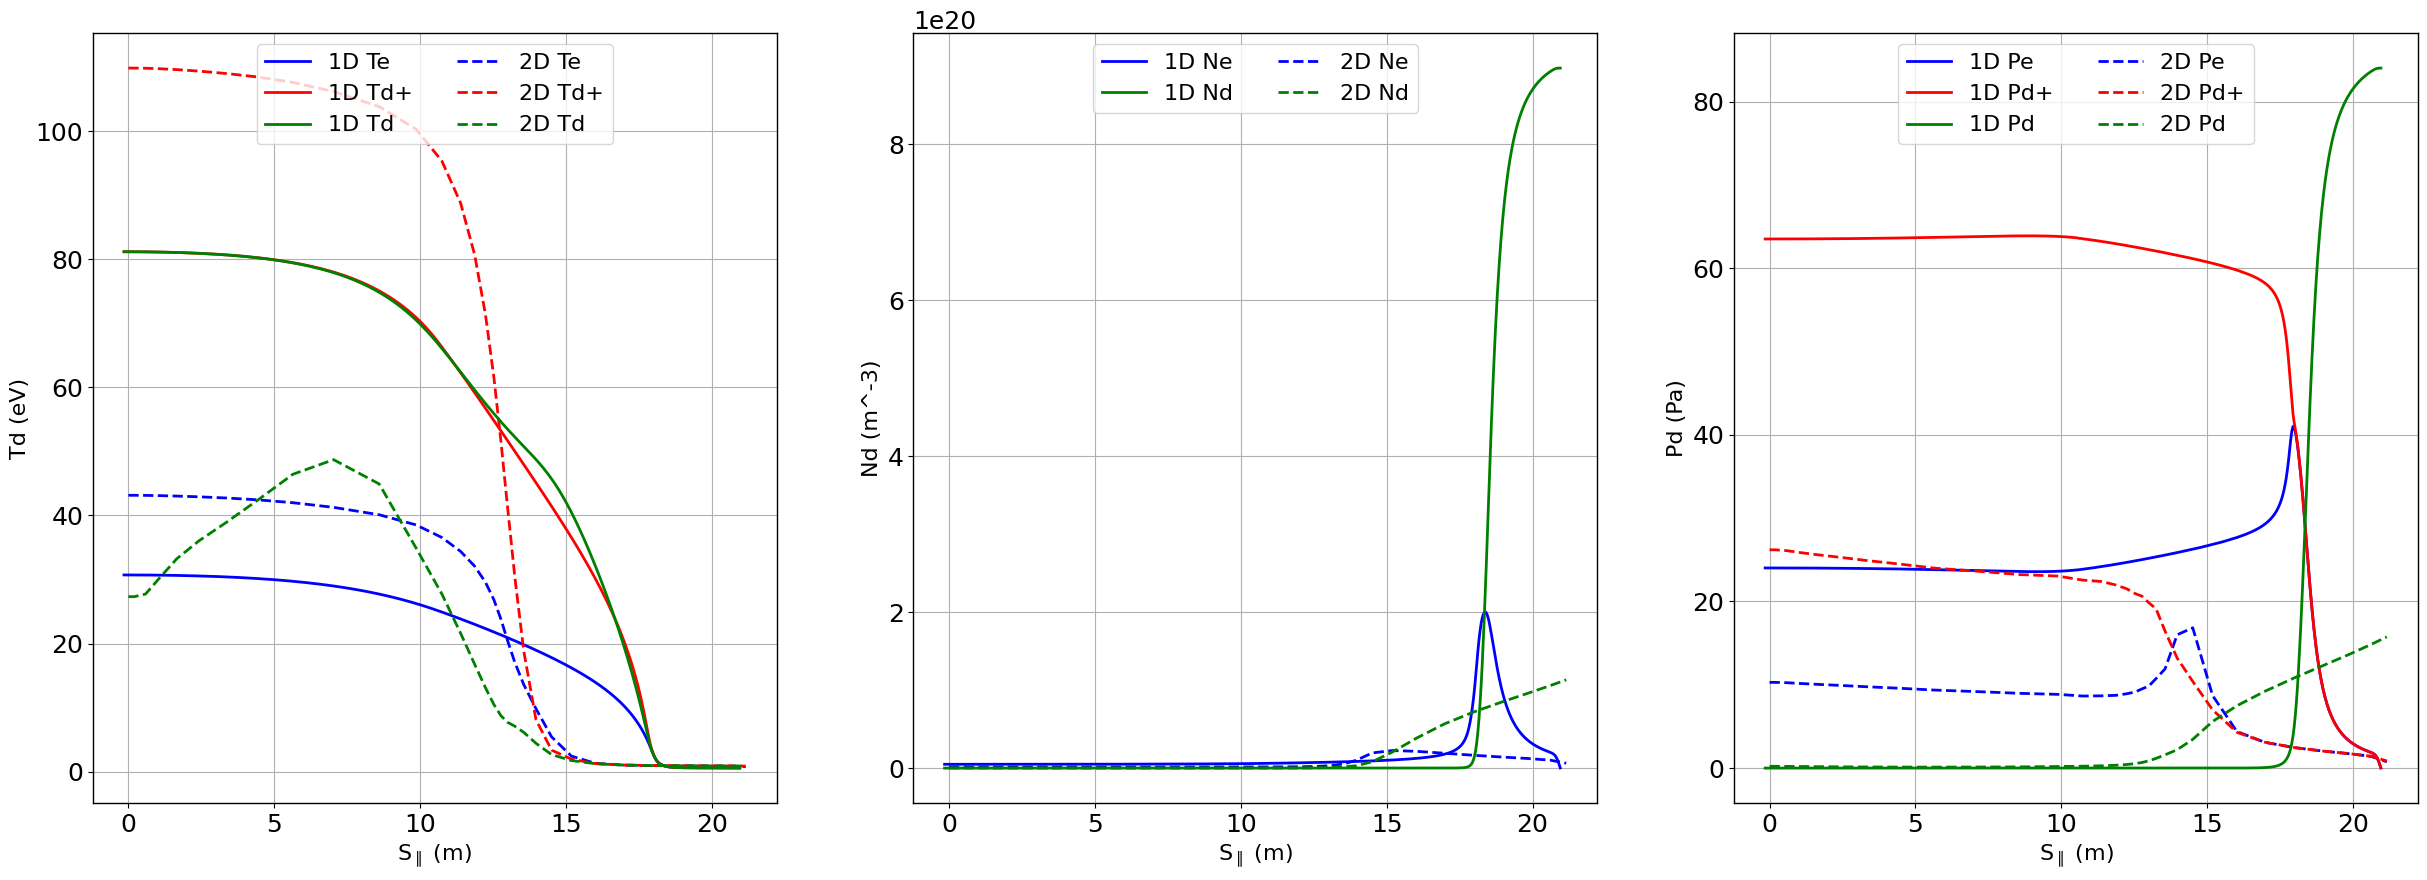

In [ ]:
plot_params = [['Te', 'Td+', 'Td'], ['Ne', 'Nd'], ['Pe', 'Pd+', 'Pd']]
colors = ['b', 'r', 'g']

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax = ax.flatten()

for i, params in enumerate(plot_params):
    if i == 1:
        colors = ['b', 'g']
    else:
        colors = ['b', 'r', 'g']
        
    # Create empty lists for 1D and 2D legends
    legend_1d = []
    legend_2d = []
    
    for j, param in enumerate(params):
        # Plot for 2D data
        line_2d, = ax[i].plot(profile['Spar'], profile[param], label=f'2D {param}', 
                              linewidth=2, linestyle='--', color=colors[j])
        # Plot for 1D data
        line_1d, = ax[i].plot(case['pos'], case[param], label=f'1D {param}', 
                              linewidth=2, color=colors[j])
        
        # Append lines to corresponding legend lists
        legend_2d.append(line_2d)
        legend_1d.append(line_1d)
    
    # Combine the 1D and 2D labels in the desired order
    ax[i].legend(handles=legend_1d + legend_2d, 
                 labels=[f'1D {param}' for param in params] + [f'2D {param}' for param in params],
                 ncols=2, loc='upper center')
    
    ax[i].set_xlabel(r'S$_{\parallel}$ (m)')
    ax[i].set_ylabel(f'{param} ({case[param].units})')


# Flux tube illustraion

6 None


/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  comm

KeyError: 'R'

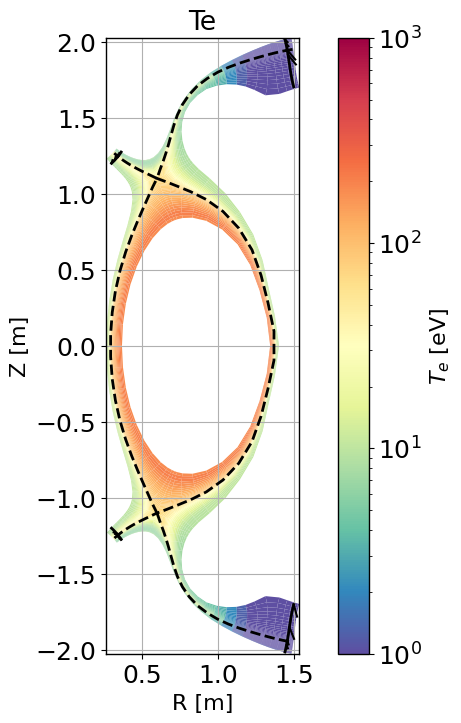

In [ ]:
fig,ax = plt.subplots(1, 1, figsize = (10, 8))

vmin = 1
vmax = 1000


profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 6)

case_2d_geom["Te"].isel(t=-1).hermesm.polygon(ax = ax, cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{e}$ [eV]")
# case_2d_geom['Ne'].isel(t=-1).hermesm.polygon(ax = ax, cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{e}$ [$m^{-3}$]")
ax.plot(profile['R'], profile['Z'], color = 'magenta', linewidth = 4, linestyle = '-')


ax.annotate('', 
            xy=(profile['R'].iloc[-1], profile['Z'].iloc[-1]), 
            xytext=(profile['R'].iloc[-2], profile['Z'].iloc[-2]),
            arrowprops=dict(facecolor='magenta', edgecolor='magenta', 
                            arrowstyle="->", linewidth=7, mutation_scale=20))



ax.set_ybound(-2,0)

# 1D comparison

In [ ]:
fcx_on_ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_on/corrected_fcx_on_high_density_4.8e18_start_floor_correction_pulse')
fcx_off_ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_off/corrected_fcx_off_high_density_4.8e18_floor_correction_start_pulse')


fcx_on_ds = fcx_on_ds.hermes.extract_1d_tokamak_geometry()
fcx_off_ds = fcx_off_ds.hermes.extract_1d_tokamak_geometry()





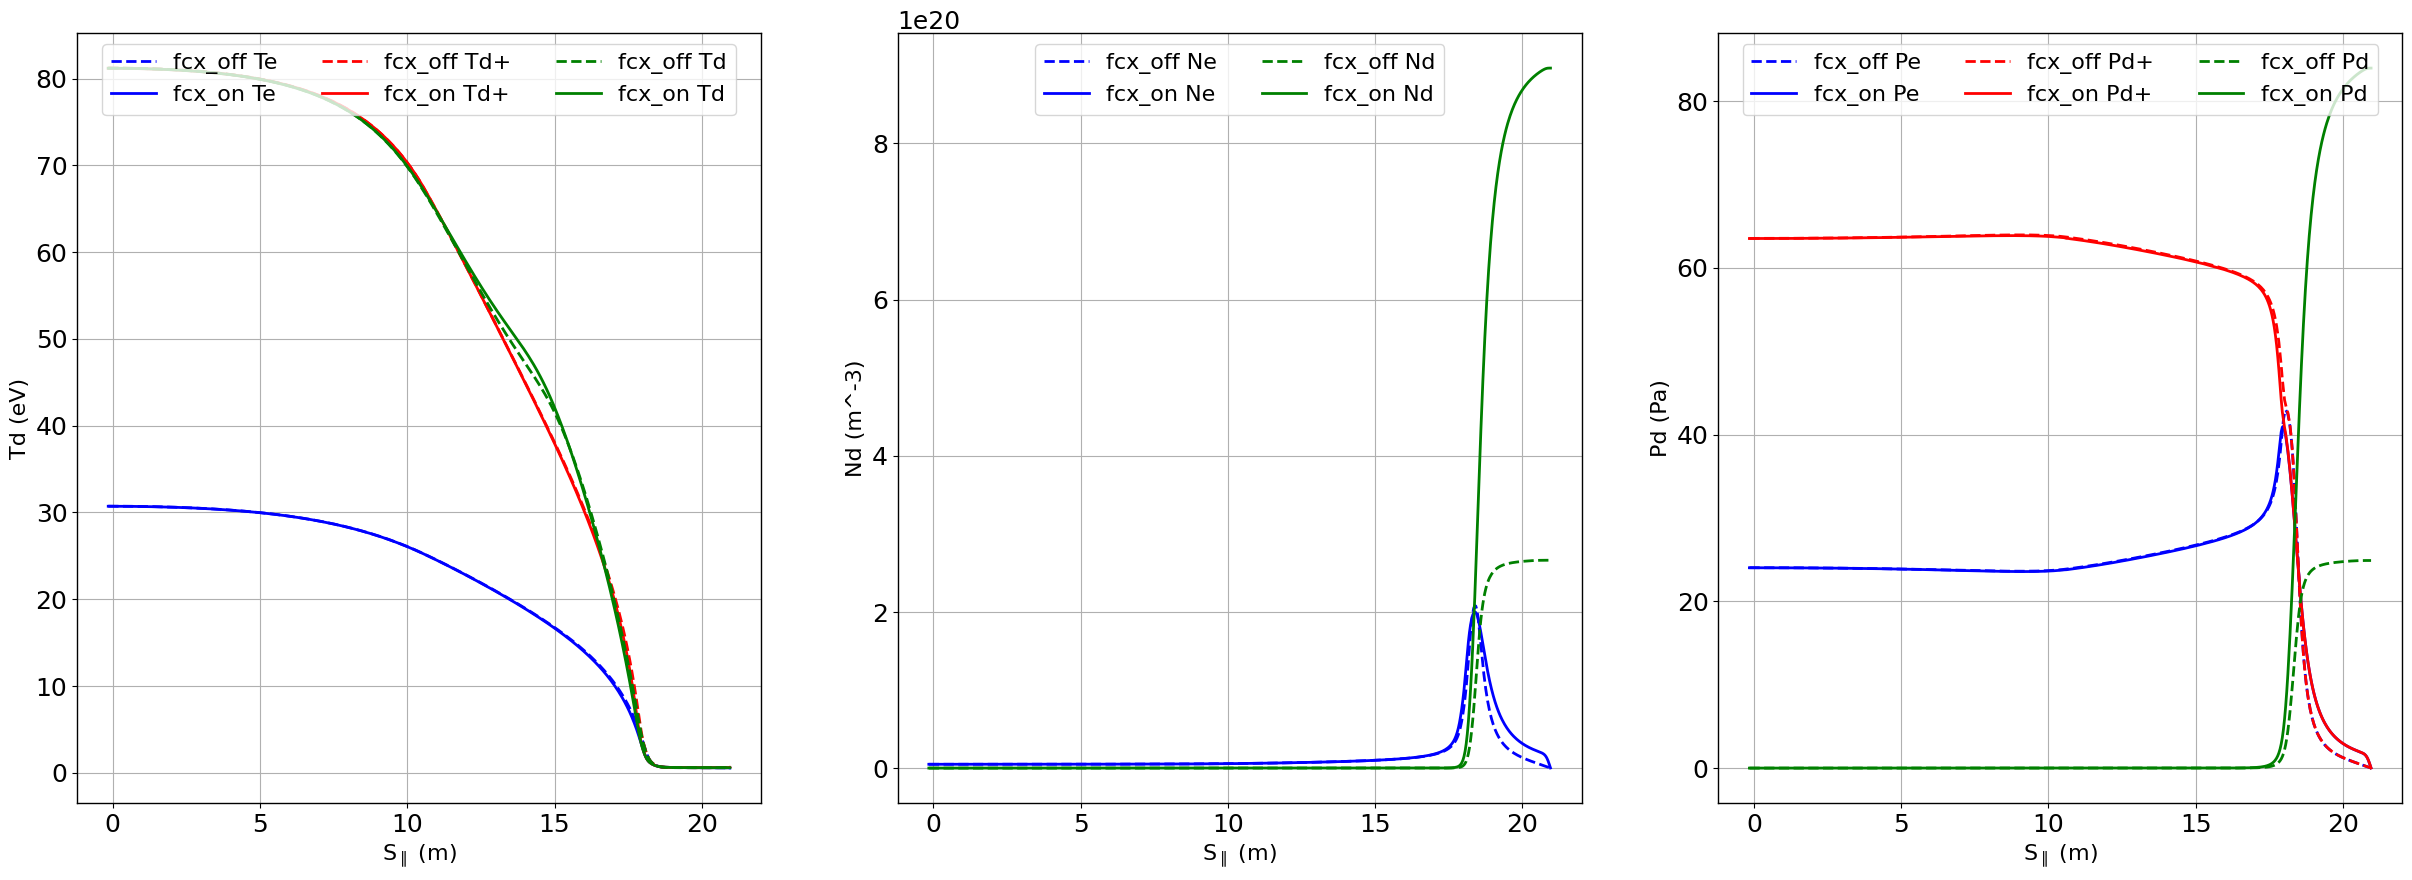

In [ ]:

plot_params = [['Te', 'Td+', 'Td'], ['Ne', 'Nd'], ['Pe', 'Pd+', 'Pd']]
colors = ['b', 'r', 'g']

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax = ax.flatten()

for i, params in enumerate(plot_params):
    if i == 1:
        colors = colors = ['b', 'g']

    else:
        colors = ['b', 'r', 'g']
    for j, param in enumerate(params):

        fc_on = fcx_on_ds.isel(t=-1)
        fc_off = fcx_off_ds.isel(t=-1)

        # Assign colors using the index 'j' for each subplot's parameter
        ax[i].plot(fc_off['pos'], fc_off[param], label=f'fcx_off {param}', 
                   linewidth=2, linestyle='--', color=colors[j])
        ax[i].plot(fc_on['pos'], fc_on[param], label=f'fcx_on {param}', 
                   linewidth=2, color=colors[j])
    ax[i].legend(ncols=3, loc='upper center')
    ax[i].set_xlabel(r'S$_{\parallel}$ (m)')
    ax[i].set_ylabel(f'{param} ({fc_off[param].units})')

ax[1].legend(ncols=2, loc='upper center')

